<a href="https://colab.research.google.com/github/Ibad17/assignment/blob/main/DL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

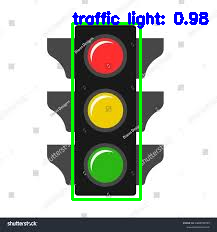

In [2]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image)

    # Perform inference
    with torch.no_grad():
        predictions = model([image_tensor])

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Draw bounding boxes for high-confidence detections
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/traff.jpg"  # Replace with your image path
    detected_image = detect_objects(IMAGE_PATH)

    # Display the output
    if detected_image is not None:
        cv2_imshow(detected_image)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 97.6MB/s]


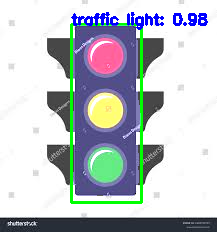

In [3]:
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F
from google.colab.patches import cv2_imshow

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# List of categories as per COCO dataset
coco_cat_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                  'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
                  'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                  'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                  'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
                  'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                  'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                  'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
                  'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
                  'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
                  'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

def detect_obj(path, threshold=0.5):
    # Load the image from the given path
    img = cv2.imread(path)
    if img is None:
        print(f'Error: Could not load image from {path}. Please check the file path and ensure the image exists.')
        return None

    original_img = img.copy()  # Make a copy of the image to draw on
    img_tensor = F.to_tensor(img)  # Convert image to tensor for the model

    # Run inference with the model
    with torch.no_grad():
        pred = model([img_tensor])

    # Extract the predicted boxes, labels, scores, and masks
    boxes = pred[0]['boxes'].cpu().numpy()
    labels = pred[0]['labels'].cpu().numpy()
    scores = pred[0]['scores'].cpu().numpy()
    masks = pred[0]['masks'].cpu().numpy()

    # Loop through all detections and draw bounding boxes and masks
    for i, box in enumerate(boxes):
        if scores[i] >= threshold:
            label_index = labels[i]

            # Map label index to category name
            if 0 <= label_index < len(coco_cat_names):
                label = coco_cat_names[label_index]
            else:
                label = f"Unknown Label ({label_index})"
                print(f"Warning: Encountered unknown label index: {label_index}")

            score = scores[i]

            # Draw bounding box
            start = (int(box[0]), int(box[1]))
            end = (int(box[2]), int(box[3]))
            cv2.rectangle(original_img, start, end, (0, 255, 0), 2)

            # Annotate the bounding box with label and score
            cv2.putText(original_img, f"{label}: {score:.2f}", start, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Masking: Apply the segmentation mask on top of the image
            mask = masks[i, 0]  # The mask is 1 channel, we take the first channel
            mask = (mask > threshold).astype(np.uint8)  # Apply threshold to create a binary mask

            # Random color for each object
            color = np.random.randint(0, 255, (1, 3), dtype=np.uint8).tolist()[0]
            colored_mask = np.zeros_like(original_img, dtype=np.uint8)

            # Apply the mask with the chosen color
            for c in range(3):
                colored_mask[:, :, c] = mask * color[c]

            # Combine the mask with the original image
            original_img = cv2.addWeighted(original_img, 1, colored_mask, 0.5, 0)

    return original_img

# Main execution
if __name__ == '__main__':
    path = '/content/traff.jpg'  # Change this to your image path
    detected_image = detect_obj(path)

    # Show the image with detected objects
    if detected_image is not None:
        cv2_imshow(detected_image)  # Show the image in a Google Colab environment